In [1]:
%reset -f 
nf=3
%run pylib/ml_analysis dark  title "Study ML analysis with $nf features"
self = FileAnalysis(f'files/dr4_2_class_{nf}_features.csv')


# Study ML analysis with 3 features

<h5 style="text-align:right; margin-right:15px"> 2024-07-04 05:22</h5>

* Loaded `files/dr4_2_class_3_features.csv`, selected "0.1<Ep<10 & variability<25 & Fp<10" 

subset,blazar,msp,psr,unID
Sources,454,125,18,2016


## Examine $P_{pulsar}$ dependence

### Projected

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa3c30989a0>
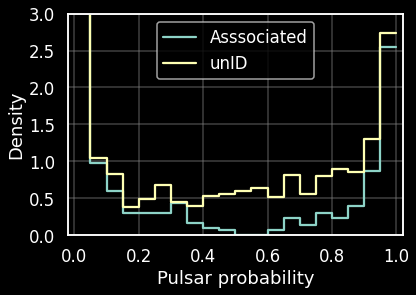

### Peak flux $F_p$ (**not** used as an ML feature)

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa3c0e38c10>
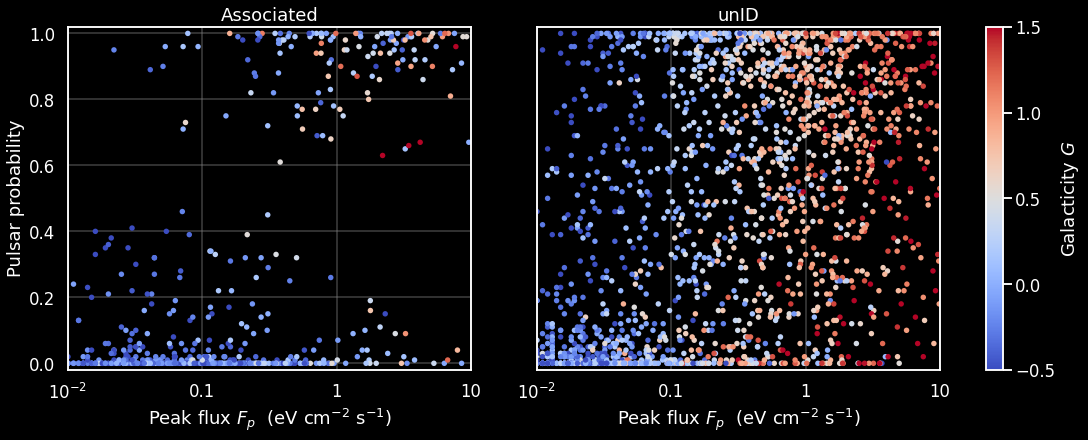

### Curvature $d$ 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa3c00ad0c0>
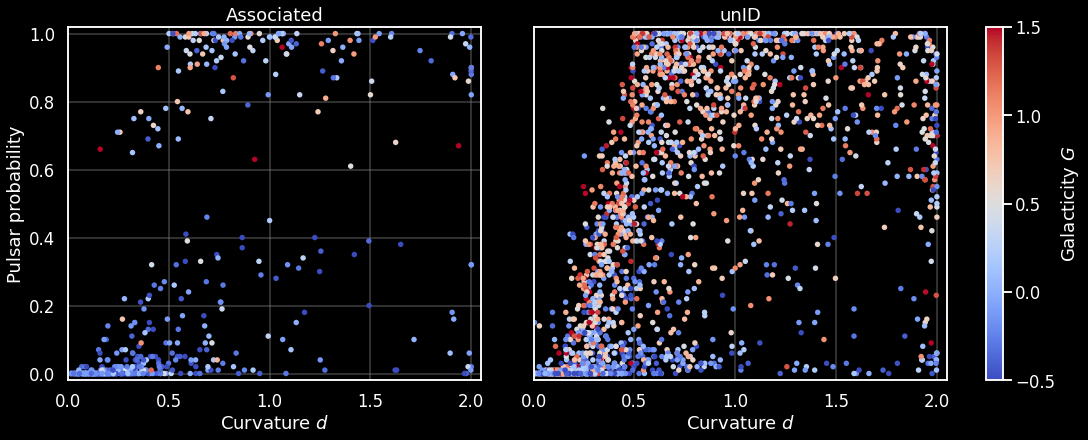

### Peak energy $E_p$ 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa3baf9a440>
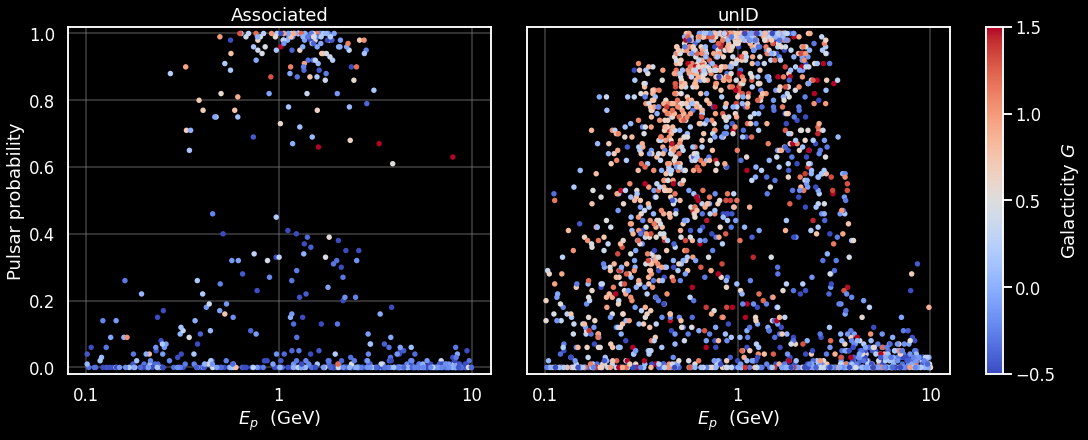

In [2]:
show("""## Examine $P_{pulsar}$ dependence""")
show("""### Projected""")
fig, ax = plt.subplots(figsize=(6,4))
kw = dict(ax=ax, x='p_pulsar',stat='density', bins=np.arange(0,1.01, 0.05), element='step', fill=False)
sns.histplot(self.assoc, **kw, label='Asssociated')
sns.histplot(self.unid,  **kw, label='unID')
ax.legend(); ax.set(**pulsar_kw('x'), ylim=(0,3));
show(fig)
show("""### Peak flux $F_p$ (**not** used as an ML feature)""") 
show_fig(self.multi_pulsar_vs_x, 'log_fpeak', );
show(""" ### Curvature $d$ """)  
show_fig(self.multi_pulsar_vs_x,'d', );
show(f"""### Peak energy $E_p$ """)   
show_fig(self.multi_pulsar_vs_x,'log_epeak', );
                  

In [3]:
show(f"""### Separate the unID's
""")

show(f"""* Label these populations I, $E_p<1$ GeV, else II,
 excluding those within {(tol:=0.15)} of $P_{{pulsar}}$ boundaries.""")
unid = self.unid.copy()
def IvsII(s): 
    p = s.p_pulsar
    # if s.Fp>4: return 'high-flux'
    if p<tol: return 'agn-like'
    if p>1-tol: return 'psr-like'
    return 'I' if s.log_epeak < 0 else 'II'
unid['population'] = unid.apply(IvsII, axis=1)
show(pd.Series(unid.groupby('population').size(),name='Number'))


### Separate the unID's

* Label these populations I, $E_p<1$ GeV, else II,
excluding those within 0.15 of $P_{pulsar}$ boundaries.

population,I,II,agn-like,psr-like
Number,604,249,670,493


### Compare the two apparent unknown populations 

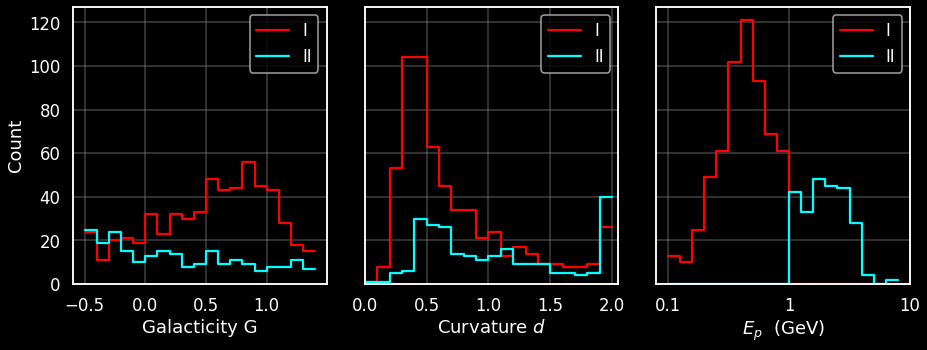

In [4]:
show(f"""### Compare the two apparent unknown populations """)

bind = dict(diffuse=np.arange(-0.5,1.5, 0.1),
           d=np.arange(0, 2.05, 0.1),
           log_fpeak = np.arange(-2,2.1, 0.25),
            log_epeak = np.arange(-1,1,0.1),
            significance=np.arange(4,20,1),
           )
fig, axd = plt.subplot_mosaic(
    [ ['diffuse',   'd', 'log_epeak',]
    ],  figsize=(15,5), sharey=True, 
    gridspec_kw=dict(hspace=0.3, wspace=0.15),
)
hkw = dict( #bins=np.arange(-0.5,1.51, 0.1),
           element='step', stat='count', fill=False,)
           # edgecolor=('w' if dark_mode else 'k'), alpha=0.2,     )
for label, ax in axd.items():
    sns.histplot(unid.query('population=="I"'), ax=ax, x=label, **hkw, bins=bind[label],  color='red',  label='I');
    sns.histplot(unid.query('population=="II"'),ax=ax, x=label, **hkw, bins=bind[label],  color='cyan', label='II');
    ax.set(** dict(d=d_kw(), log_epeak=epeak_kw(), log_fpeak=fpeak_kw(), 
                   diffuse=dict(xlabel='Galacticity G')).get(label, {} ))
# sns.histplot(egal.diffuse, **hkw, color='green', label='egal');
    ax.legend();

# Study $d$ vs $E_p$

##  $P_{pulsar}$ hue

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa3bad52950>
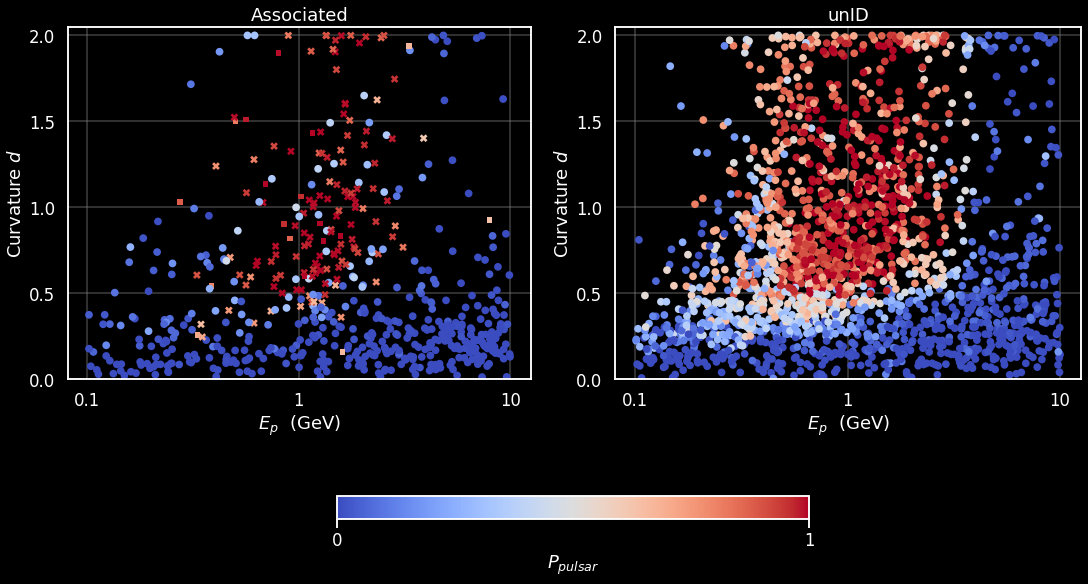

Showing unID with $0.15< P_{pulsar} < 0.85$.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa3ba7e10c0>
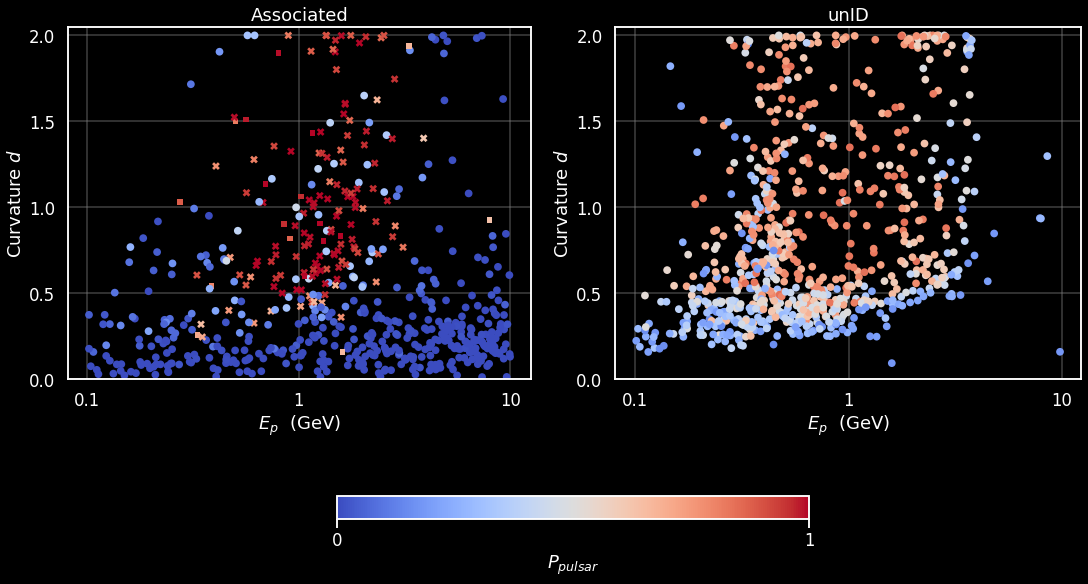

In [5]:
def d_vs_ep(self, unid_cut='0.15<p_pulsar<0.85', hue='p_pulsar',):
    fig, axd = plt.subplot_mosaic(
                'AAUU;.CC.',
                height_ratios=[15,1],
                gridspec_kw=dict(hspace=0.2),
                figsize=(15,8), sharey=False, layout='constrained')
    hue_norm = (0,1) if hue=='p_pulsar' else (-0.5,1.5)
    scat_kw=dict( y='d', x='log_epeak', s=60, edgecolor='none', legend=False,
                           hue=hue, hue_norm=hue_norm, palette='coolwarm')
    for key, ax in axd.items():
        if key=='U':
            unid = self.unid.query(unid_cut) if unid_cut else self.unid
            sns.scatterplot(unid, ax=ax, **scat_kw)
            ax.set(**epeak_kw('x'), **d_kw('y'), title='unID', )        
        elif key=='A':
            sns.scatterplot( self.assoc, ax=ax, **scat_kw, style='subset' )
            ax.set(**epeak_kw('x'), **d_kw('y'), title='Associated')
        else:
            gbar(ax, orientation='horizontal',
                 label='$P_{pulsar}$' if hue=='p_pulsar' else 'Galacticity',
                 norm=hue_norm,  ticks=hue_norm)
    return fig
show("""# Study $d$ vs $E_p$""")
show("""##  $P_{pulsar}$ hue""")
show_fig(d_vs_ep, self, None)
show(""" Showing unID with $0.15< P_{pulsar} < 0.85$.""")         
show_fig(d_vs_ep, self,)
# self.assoc.groupby('subset').size()

## Galacticity hue

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa3ba6dfcd0>
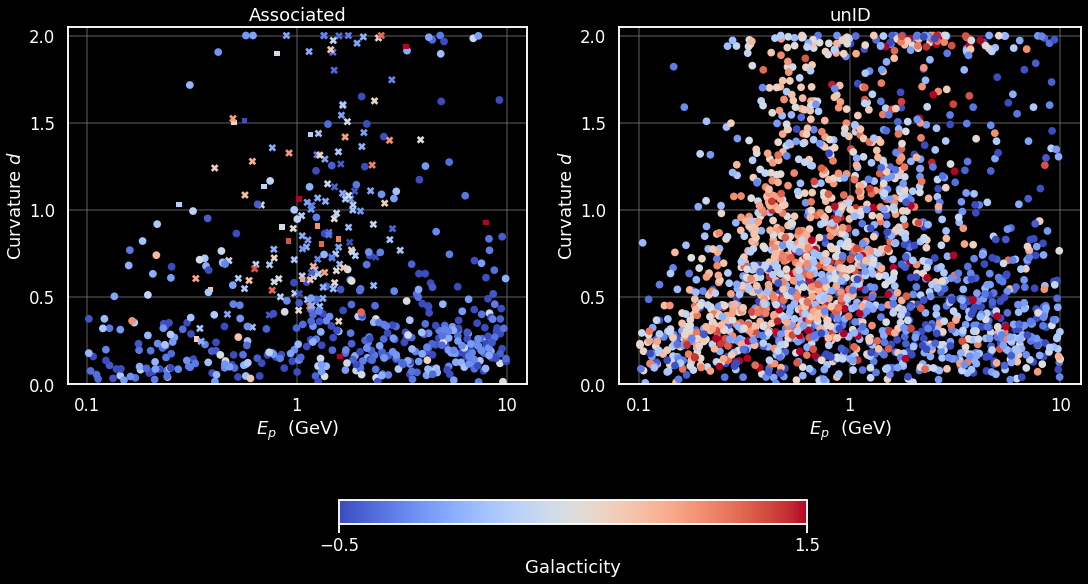

In [6]:
show("""## Galacticity hue""")
show_fig(d_vs_ep, self,  hue='diffuse', unid_cut=None)

In [7]:
show(f"""## Select unID subset with low curvature!
It appears that there are many with intemediate Galacticity.
<br>The cut: {(cut:='d<0.5 & p_pulsar>0.15')}
""")
dflg = self.unid.query(cut).copy()
show(f""" Selects {len(dflg)} sources""")

## Select unID subset with low curvature!
It appears that there are many with intemediate Galacticity.
<br>The cut: d<0.5 & p_pulsar>0.15

Selects 309 sources

In [8]:
if False:
    show(f"""## Galacticity""")
    fig, ax = plt.subplots(figsize=(8,5))
    sns.histplot(self.assoc, x=self.assoc.diffuse.clip(-0.5,1.5), hue='association',
                 stat='density', common_norm=False,
                 element='step', fill=False, bins=np.arange(-0.5,1.51,0.1)); 

In [9]:
show("""---""")
assert False


---

AssertionError: 

In [ ]:
from astropy.io import fits
hcus = fits.open("/mnt/c/users/thbur/onedrive/fermi/diffuse/gll_iem_v07_hpx.fits")
hcus.info()
hcus[2].data